In [115]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [116]:
import numpy as np
import pandas as pd

In [117]:
import datetime as dt
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [119]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [120]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [121]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [122]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [123]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

2017-08-23 00:00:00


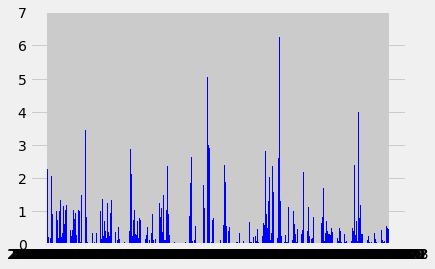

In [155]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Using the sql import
# data = pd.read_sql('''SELECT * FROM Measurement WHERE date BETWEEN "2010,01,01" AND "2018,08,23"''', conn)
# data.head()

# find the last recording date
max_date = session.query(func.max(Measurement.date)).all()
# print(max_date)

#make the max date the end date. 
end_date = max_date[0][0]
# print(end_date)

## find 1 year prior to the last recording date
year = timedelta(days=365)
# print(year)

# convert last recording date to date format
end_date_ = datetime.strptime(end_date, '%Y-%m-%d')
print(end_date_)

# begin date is last recording date minus 1 year
begin_date_ = end_date_ - year
# print(begin_date_)

# sel = [ #Measurement.id,
#         #Measurement.station,
#         Measurement.date,
#         Measurement.prcp,
#         #Measurement.tobs]

Twelve_month = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= begin_date_, Measurement.date <= end_date_).all()

Twelve_month

# create datafram of dates and percipataion 
Twelve_month_df = pd.DataFrame(Twelve_month,columns=["date","prcp"])

#sort all the same dates from different stations 
Twelve_month_df = Twelve_month_df.sort_values(by='date').reset_index()

#Read the dataframe
Twelve_month_df

# data = pd.read_sql("SELECT * FROM Twelve_month", conn)
# data.head()

# session.query(<tablename>.<column name>).filter(<tablename>.date >= datetime.date(<y>, <m>, <d>))
# Twelve_month = session.query(Measurement.date).filter(Measurement.date>=dt.date(2016, 8, 23))
# print(type(Twelve_month))

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
# Twelve_month_df.set_index('date')
#Twelve_month_df.groupby("date")
#Twelve_month_df

# Sort the dataframe by date
# Twelve_month_df.sort_index().set_index('date')

# Sort the dataframe by date
# Twelve_month_df.sort('date')

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = Twelve_month_df["date"]
y_axis = Twelve_month_df["prcp"]

plt.bar(x_axis, y_axis, color="b", align="center")
plt.show()
# plt.tight_layout()

![precipitation](Images/precipitation.png)

In [125]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df=Twelve_month_df["prcp"]

#maxium percipitation for the year
prcp_df.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [126]:
# Design a query to show how many stations are available in this dataset?

Stations = session.query(Measurement).group_by(Measurement.station).count()
print(Stations)

9


In [176]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Stations_2 = 
session.query(Measurement.station).all() #I am calling up the query data, specificall
# Stations_df=pd.DataFrame(Stations_2,columns=["station"]) #putting the query data in the datafrome 
# Stations_df.head()

sel=[Measurement.station, func.count(Measurement.station).label("count")]
Stations_2 = session.query(*sel).group_by(Measurement.station).order_by("count").all()
Stations_2

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

## Optional Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
